Voici un résumé du processus de **GloVe** avec les formules essentielles :

1. **Construire la matrice de co-occurrence** :
   - On construit une matrice \( X \), où chaque élément \( $X_{ij}$ \) représente le nombre de fois que le mot \( i \) apparaît dans le contexte du mot \( j \).
   - La matrice de co-occurrence est basée sur les fenêtres de contexte définies autour des mots cibles dans le corpus.

2. **Appliquer la fonction de coût** :
   - GloVe cherche à factoriser cette matrice en deux matrices de vecteurs \( W \) et \( W' \) (pour les mots et leurs contextes respectivement) afin que leur produit scalaire approchât \( $\log(X_{ij})$ \).
   - La fonction de coût de GloVe est la suivante :

   \[$
   J = \sum_{i,j} f(X_{ij}) \left( \mathbf{w_i}^\top \mathbf{w_j'} - \log(X_{ij}) \right)^2
   $\]

   Où :
   - \( $\mathbf{w_i}$ \) et \( $\mathbf{w_j'}$ \) sont les vecteurs d'embedding pour les mots \( i \) et \( j \).
   - \( $X_{ij}$ \) est le nombre de co-occurrences entre \( i \) et \( j \).
   - \( $f(X_{ij})$ \) est une fonction de pondération qui réduit l'impact des co-occurrences fréquentes, définie comme :

   \[$
   f(X_{ij}) = \left( \frac{X_{ij}}{X_{\text{max}}} \right)^\alpha \quad \text{si} \quad X_{ij} < X_{\text{max}}
   $\]

3. **Optimisation des vecteurs** :
   - On applique une méthode d'optimisation (comme la descente de gradient) pour ajuster les vecteurs \( $\mathbf{w_i}$ \) et \( $\mathbf{w_j'}$ \) afin de minimiser la fonction de coût.

4. **Obtenir les embeddings** :
   - Une fois l'optimisation terminée, les vecteurs \( $\mathbf{w_i}$ \) représentent les embeddings des mots, capturant les relations sémantiques basées sur les co-occurrences globales dans le corpus.

**En résumé avec les formules** :
- La fonction de coût est optimisée pour minimiser l'écart entre le produit scalaire des vecteurs des mots et le logarithme des co-occurrences.
- L'optimisation produit des embeddings qui représentent les mots dans un espace vectoriel dense.

In [1]:
import gensim
from sklearn.manifold import TSNE
import gensim.downloader as api


my_vocab = ['apple','orange','shimla','banana','maruti','mumbai','china','india','husband'
            ,'wife','brother','sister','red','yellow','computer','mobile','pear','guava']

glove_model = api.load('glove-wiki-gigaword-300')

glove_model.most_similar('love',topn=5)


[==================================================] 100.0% 376.1/376.1MB downloaded


[('loves', 0.6420262455940247),
 ('passion', 0.6261469125747681),
 ('loved', 0.595270574092865),
 ('romantic', 0.5921086072921753),
 ('lovers', 0.5904366970062256)]

In [2]:
glove_model.most_similar(positive= ['woman', 'husband'], negative=['man'],topn=1)

[('wife', 0.7732622027397156)]

In [3]:
words = []
vectors = []


for word in my_vocab:
    words.append(word)
    vectors.append(glove_model[word])

In [4]:
dicts = zip(words,vectors)

In [6]:
import numpy as np
from sklearn.manifold import TSNE

# Assuming vectors is a list, convert it to a NumPy array
vectors = np.array(vectors)

dim_model = TSNE(n_components=2, perplexity=3, init='pca', random_state=45)
fit_model = dim_model.fit_transform(vectors)

fit_model


array([[ 19.215422 ,  34.85211  ],
       [ 47.77074  ,  17.663597 ],
       [-11.100541 , -30.177464 ],
       [ 24.490843 ,  47.58159  ],
       [  4.7730684, -30.616554 ],
       [ -6.2003508, -24.605118 ],
       [  2.8754706, -16.10858  ],
       [ -0.5751663, -22.475227 ],
       [-29.527737 ,  16.145689 ],
       [-24.952433 ,  12.792942 ],
       [-34.736103 ,  10.42366  ],
       [-27.149767 ,   5.881508 ],
       [ 49.031746 ,   7.0978827],
       [ 51.09459  ,  12.178113 ],
       [ 15.246805 ,  29.65535  ],
       [ 12.180234 ,  24.17477  ],
       [ 33.068592 ,  43.2668   ],
       [ 30.139277 ,  49.170925 ]], dtype=float32)

In [7]:
x = []
y = []

for i in fit_model:
    x.append(i[0])
    y.append(i[1])

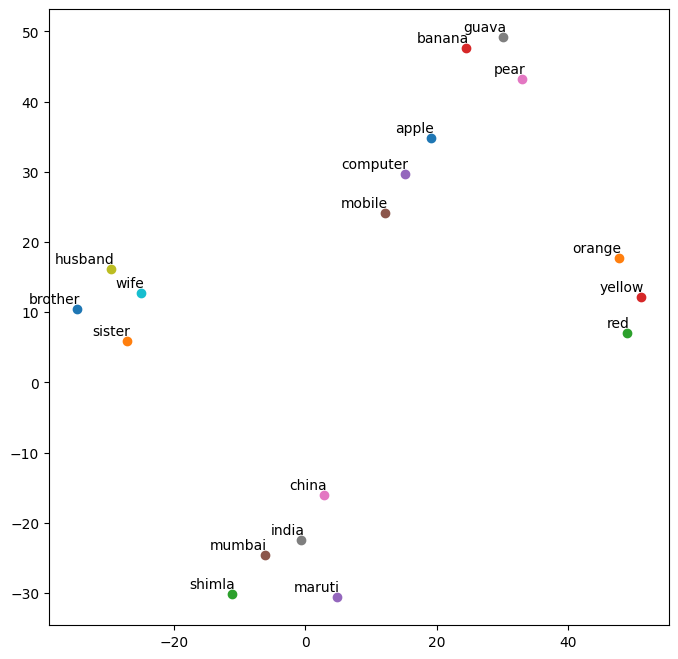

In [8]:
plt.figure(figsize=(8,8))

for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(words[i], xy=(x[i],y[i]),
                 xytext=(2, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom'
                )
